# Chapter 3: Classification 
___

Classification tasks represent one pillar of machine learning. In this chapter, we will uncover in greater depths what they are and how we should approach them. 

## 1. A Famous Classification Dataset: `MNIST`

### 1.1. Loading `mnist`

This dataset contains $70,000$ labelled handwritten digits. The purpose is to create an algorithm able to recognize the digits. 

The first steo is to load the data using `scikit-learn`: 

In [2]:
from sklearn.datasets import fetch_openml

# the dataset: 
mnist = fetch_openml('mnist_784', as_frame = False) # as_frame = False to get numpy arrays since a df would be useless here

# the data:
X, y = mnist['data'], mnist['target']

print(X)
print(y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['5' '0' '4' ... '4' '5' '6']


For the `y` array, it is pretty straightforward to understand what we get: an array with all the labels. However, for understanding `X`, we should inspect its dimensions: 

In [3]:
X.shape

(70000, 784)

First, we see that we have $70000$ rows and each row has $784$ features. Here is the explanation: 
+ One row is one digit.
+ The digits are a picture consisting of 28x28 pixels, i.e. $748$ pixels which store the pixel's intensity ranging from $0$ (white) to $255$ (black).

Now, we will visualize one of these digits: 

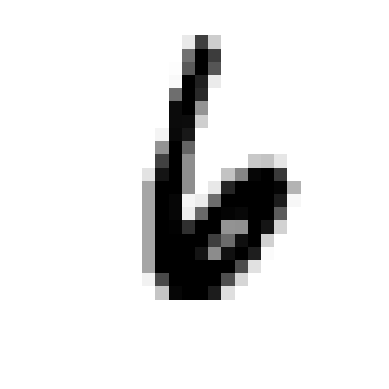

In [4]:
import matplotlib.pyplot as plt

# we build a function to plot a digit
def plot_digit(image_data): 
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap = 'binary') # cmap = 'binary' to get a black and white image
    plt.axis('off')
    plt.show()

# let's plot a digit
plot_digit(X[204])



Now, if we inspect the label of the $204$-th feature: 

In [5]:
y[204]

'6'

### 1.2. Train Set & Test Set

Finally, before inspecting the data further, we should save a test set. Fortunately, the `mnist` dataset is very didactical and has already been approrpriately shuffled for us. The first $60,000$ observations are the train set: 

In [6]:
# split the data into training and testing sets
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

Thus, we have $60,000$ observations for training: 

In [7]:
X_train.shape

(60000, 784)

### 1.3. Inspecting the Digits

Now, we inspect few more digits with a new function:    

In [8]:
import numpy as np

def plot_digits(X): 
    n = len(X)
    rows = int(np.ceil(np.sqrt(n)))
    cols = int(np.ceil(n / rows))
    count = 0

    fig, ax = plt.subplots(rows, cols, figsize = (cols, rows))
    for row in range(rows):
        for col in range(cols):
            
            # prevent errors: 
            if count == n: 
                break

            ax[row, col].imshow(X[row * cols + col].reshape(28, 28), cmap = 'binary')
            ax[row, col].axis('off')
            count += 1
  
    
    plt.show()
       

Now, we choose a sample to print the first $36$ digits:

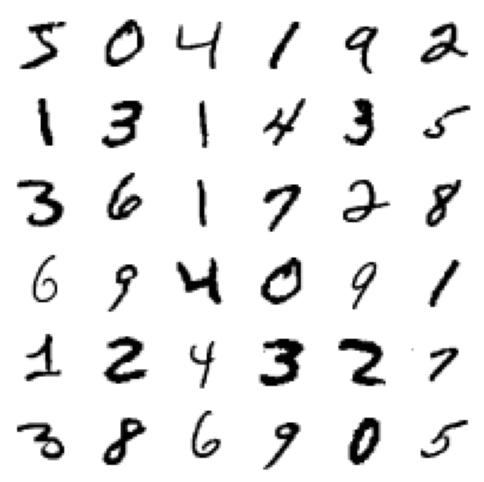

In [9]:
plot_digits(X_train[:36])

## 2. Training a Binary Classifier

### 2.1. The Model 

For this first step, we will only build a program that can recognizes whether a given number is a five or not. Again, the following chapters will uncover in more detail the mathematics and the algrithms behind what we are doing right now. The focus of this section is rather oriented on learning how to evaluate classification models. 

Since we want a binary classifier, let's focus on a classifier that either outputs `True` if it identifies a $5$ or `False` if it is something else. 

Let's build our boolean vectors: 

In [10]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

Now we pick a classifier `SDGClassifier()`, which is based on stochastic gradient descent, thus effective for handling large datasets, and train it on the `train_sets`: 

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

Before delving into how we can evaluate the model performances at this particular task, let's make a prediction on a random sample: 

In [13]:
import random as rn 

# we generate 10 random digits
rn.seed(42)
digits = rn.sample(range(0, 60000), 10)
digits

# we predict if the digits are 5s
preds = sgd_clf.predict(X_train[digits])
print(preds)

# we check the actual values
y_train[digits]

[False False False False False False  True False False False]


array(['9', '4', '7', '2', '9', '7', '5', '6', '9', '9'], dtype=object)

Woow! It looks like this model is performing quite well since it rightfully detected the $5$ in a random sample of $10$ elements. But are we really convinced by the performances of this model. Is there a way to evaluate more systematically the model's performances?

### 2.2. Performance Measures

Oftentimes, evaluating a classifier is much trickier than evaluating a regressor. This is the reason why we we spend quite some time in this section to wrap our head around this particular issue. 

#### 2.2.1. Measuirng Accuracy Using Cross-Validation

A good way to evaluate a model is to use cross validation, as we did in chapter 2 with our regression project. We can proceed like this: 

In [14]:
from sklearn.model_selection import cross_val_score

score_cv3 = cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')
float(score_cv3.mean())

0.9570333333333334

Now, even with cross validation, our model seems to be really good since it has over a $95$% accuracy. However, are we really sure that it is that good? To examine this statement, we can compare the performances of this model against the ones of a very simple model named `DummyClassifier()`. Basically, this model classifies every image on the most frequent class. Therefore, since we have a lot more `False` than `True`, the `DummyClassifier()` will only predict `False`: 

In [15]:
from sklearn.dummy import DummyClassifier

# we train the dummy classifier
dum_clf = DummyClassifier(strategy = 'most_frequent')
dum_clf.fit(X_train, y_train_5)

# we make some predictions
preds_dum = dum_clf.predict(X_train[digits])
print(preds_dum)

[False False False False False False False False False False]


As we have announced before, it will *predict* onyl the most frequent class, namely `False`. Clearly, the logic behind this model indicates that we probably perform  much better with our `SGDClassifier()`. Really?

In [16]:
scores_dummy = cross_val_score(dum_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')
float(scores_dummy.mean())

0.90965

We still observe an accuracy of $90$%! Not bad!  

Enough irony though, if we have a $90$% accuracy, that is only explained by the fact that in our dataset, we probably have only $10$% of digits that are fives. Thus, if we were to have an accuracy below $90$%, this means that the model would be worse than to randomly guess the class. 

**Intermediate Conclusion**  

This example has shown to us that when we deal with skewed datasets (unequal distribution of classes), **accuracy** is probably not the performance measure we are looking for. In this case we are handling digits recognition, but imagine that we were to build a rare disease classifier. In the case where the disease would be extremely rare (e.g. only $0.001$ % of the population is infected), our `DummyClassifier()` would have an accuracy of $99.999$ %.  

#### 2.2.2. Implementing Cross-Validation

If we want to have more control over the cross-validation process, we can also proceed this way: 

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# we create an instance of StratifiedKFold with 3 splits:
skfolds = StratifiedKFold(n_splits = 3, random_state = 42, shuffle=True)

# we train the model and make predictions
for train_index, test_index in skfolds.split(X_train, y_train_5): # this for loop will iterate 3 times with different train and test indexes
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    # we train the model
    clone_clf.fit(X_train_folds, y_train_folds)

    # we make predictions
    y_pred = clone_clf.predict(X_test_fold)

    # we calculate the accuracy
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))



0.9669
0.91625
0.96785


With the last lines of code, we uncovered what is the formula we used under the hood for computing the accurcacy:  

The accuracy of a model, especially in the context of classification tasks, is defined as the ratio of the number of correct predictions to the total number of predictions made. For a binary classification problem, the formula is usually expressed in terms of True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN):  

$$
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
$$
In this case, all the correct predictions ($\text{TP} + \text{TN}$) are computed by: 
```python 
n_correct = sum(y_pred = y_test_fold)
```

and the total number of observations ($\text{TP} + \text{TN} + \text{FP} + \text{FN}$): 
```python
len(y_pred)
```


#### 2.2.3. Confusion Matrices, Precision and Recall

A confusion matrix is a visual destined to represent how our model performs and where precisely errors are comitted. This short example will help us to understand: 

First, we use the function `cross_val_predict()` to performs $k$-fold cross validation, instead of returning the evaluation scores, it returns the predictions made on each test fold. It generate cross-validated estimates for each input data point. The data is split according to the cv parameter. Each sample belongs to exactly one test set, and its prediction is computed with an estimator fitted on the corresponding training set.

In [18]:
from sklearn.model_selection import cross_val_predict

# we make predictions using cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

# print the predictions
print(y_train_pred)

[ True False False ...  True False False]


Now, with our predictions stored into the variable `y_train_pred`, we build the confusion matrix: 

In [19]:
from sklearn.metrics import confusion_matrix

# we calculate the confusion matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

How can we interpret this **confusion matrix**? It is important to understand that each row represents a **actual class** and each column represents a **predicted class**. Judging by the numbers and the information we have on the accuracy of our model, we can read this confusion matrix as follow: 

|          | Predicted Neg. | Predicted Pos. |
|----------|----------------|----------------|
| **Negative** | $53,892$   (TN)       | $687$        (FP) - *type I error*   |
| **Positive** | $1,891$    (FN)  - *type II error*     | $3,530$       (TP)    |


If we want, we can plot this:

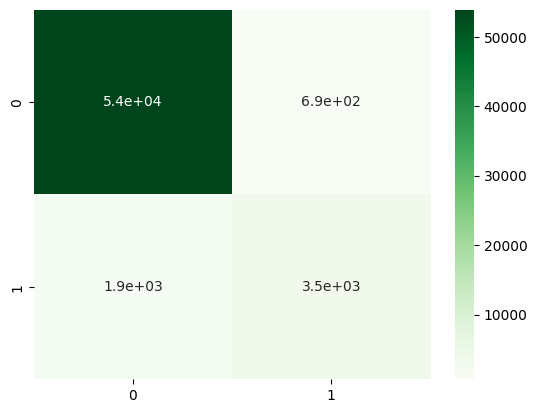

In [20]:
import seaborn as sns

# plot the confusion matrix
sns.heatmap(cm, annot = True, cmap = 'Greens')
plt.show()

Of course, the confusion matrix gives us a lot of information but if we are looking for a more concise metric, **precision** might be the right candidate. Precision is computed as follows:  
$$
\text{precision} = \frac{TP}{TP + FP}
$$
If we compute precision in our case:  

In [21]:
from sklearn.metrics import precision_score

# calculate the precision
precision = precision_score(y_train_5, y_train_pred)
print(round(float(precision), 4)*100, "%")

83.71 %


However, **precision** alone is not a bullet proof metric since one can easily inflate this number by using a model that only predicts a very small number of false positive (in our case, this means that we very seldomly predict that the class is `not_five`).  

 $\Rightarrow$ we always predict `True` 

In [22]:
y_true = np.array([True]*60000)
y_true

array([ True,  True,  True, ...,  True,  True,  True])

In [23]:
precision_only_trues = precision_score(y_true, y_train_pred)
print(round(float(precision), 4)*100, "%")

83.71 %


To avoid this, we often couple the **precision** metric with another one: the **recall**. The recall is computed as:  
$$
\text{recall} = \frac{TP}{TP + FN}
$$
and it represents the ratio of positive instances that are correctly classified by the classifier.
We can compute it for the case at hand: 

In [24]:
from sklearn.metrics import recall_score

# calculate the recall
recall = recall_score(y_train_5, y_train_pred)
print(round(float(recall), 4)*100, "%")

65.12 %


A recall of $65.12$ % means that we detect $65.12$ % of the fives present in the dataset. 

#### 2.2.4. Precision and Recall Mixed: The $F_1$ Score

Since it is essential to consider precision and recall together for a comprehensive evaluation, having a single metric that combines both is particularly useful for comparing models. This metric is known as the **$F_1$ score**:  
$$
F_1 = 2 \times \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}}
$$
Indeed, the $F_1$ score is the **harmonic mean** of the precision and the recall. Whereas the regular mean treats all values with an equal weight, the harmonic mean puts the emphasis on smaller values. As a result, the classifier will only get a high $F_1$ score if both recall and precision are high. 

If we compute it for our case: 

In [25]:
from sklearn.metrics import f1_score

# calculate the f1 score
f1 = f1_score(y_train_5, y_train_pred)
print(round(float(f1), 4))

0.7325


Furthermore, one should keep in mind that the $F_1$ score is absolutely not a must but simply an additional and (depending on the cases) useful metric. What's important to remember is that sometimes one will choose to either maximize the recall or to only maximize the precision. However, doing both at the same time is quite not possible. This is called the *precision/recall trade-off*.  

#### 2.2.5. The Precision/Recall Trade-off

To understand this trade-off, we first must understand how the `SDGClassifier()` makes its classification decision. For each instance, it computes a score based on a **decision function**. If that score (which could be associated to a probability depending on the decision function) is greater than a certain threshold, it assigns the instance to the positive class: otherwise it assigns it to the negative class. The choice of the threshold is detrimental in understanding the precision-recall trade-off. If we increase the threshold, our precision will increase because we are more exigent when classifying (e.g. now we only accept to classify an instance as positive if it is positive with a probability equal or higher than $80$%–our threshold). The more we increase the threshold, the less we will have false positive... our precision is increasing. However, at the same time our recall is decreasing because we are *catching* less positive instances since we are more exigent with our threshold. This is the precision/recall trade-off in action.

Let's visualize this: 

In [27]:
# we get the decision scores
y_scores = sgd_clf.decision_function(X_train[digits])

# we print the decision scores
print(y_scores)

[-10625.03866066  -1652.58562584  -4169.40192295  -7682.29527159
  -3411.39754682 -10201.70274104   4915.29294384  -5196.15605632
 -11690.73987158  -4506.13787837]


These are the scores attributed to each instance (digit) that the classifier is recognizing. Be default, scikit-learn sets the threshold to $0$. Therefore, we can use the array `y_scores` to understanf which digits are classified as positive (5s): 

In [28]:
y_classes = y_scores > 0
y_classes

array([False, False, False, False, False, False,  True, False, False,
       False])

In [30]:
# we inspect the one classified as True: 
indice = digits[6]
y[indice]

'5'

This was indeed a five. Now, what happen if we increase the threshold to $5000$?

In [33]:
threshold = 5000
y_classes2 = y_scores > threshold

# print
print(y_classes2)

[False False False False False False False False False False]


Now, we only have some `False`. By doing so, we increase the precision but, as we can see, decrease the recall. 

Then, we visualize how the precision and recall behave in function of the threshold: 

In [34]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

When using `cross_val_predict` with `cv=3`, the dataset is divided into three folds. For each fold, the model is trained on two of the folds and then predictions (or decision function scores, in this case) are made on the remaining fold.

For example:
+ Fold 1: Trains on Fold 2 + Fold 3, makes predictions for Fold 1.
+ Fold 2: Trains on Fold 1 + Fold 3, makes predictions for Fold 2.
+ Fold 3: Trains on Fold 1 + Fold 2, makes predictions for Fold 3.

Thus, the scores for the entries in the first $20,000$ indices (Fold 1) are computed by the model trained on the second and third folds. Similarly, entries from $40,000$ to $60,000$ (Fold 3) are computed based on the model trained on the first and second folds. This ensures that the predictions for each entry are made using a model that has never seen that particular entry during training.

We can print some of these scores: 

In [36]:
print(y_scores)
print(y_scores.shape)

[  1200.93051237 -26883.79202424 -33072.03475406 ...  13272.12718981
  -7258.47203373 -16877.50840447]
(60000,)


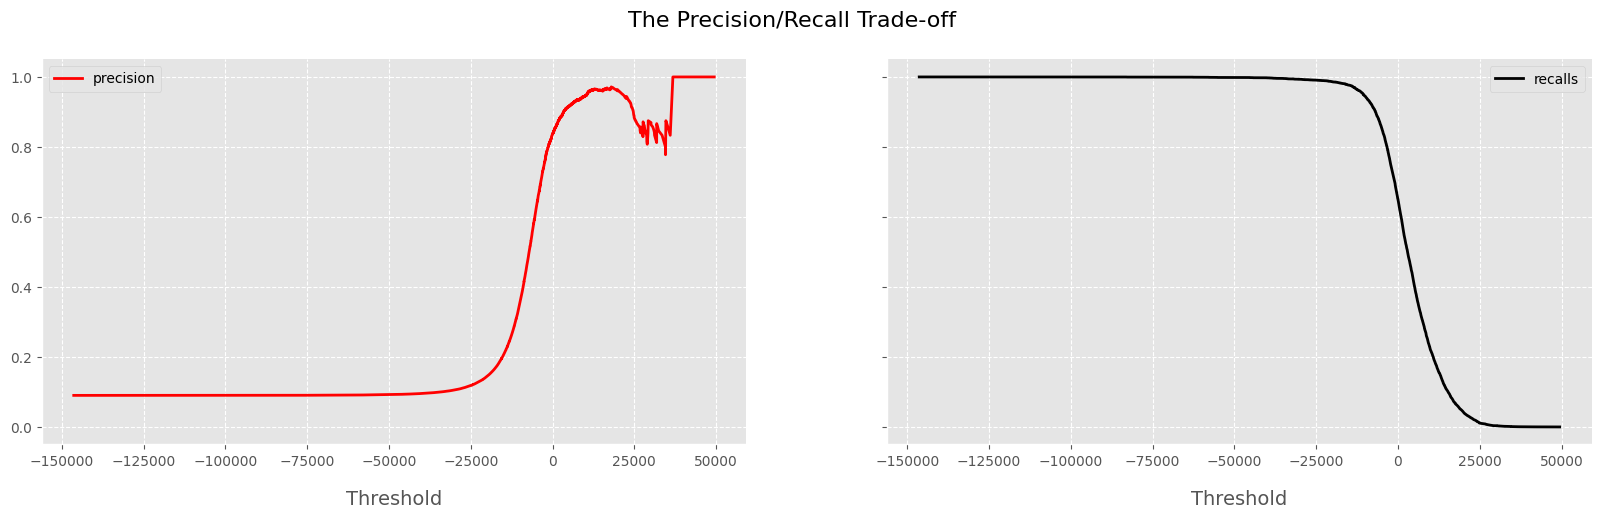

In [86]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

# the plot: 
plt.style.use('ggplot')
fig, ax = plt.subplots(1, 2, figsize = (20, 5), sharey = True)
ax[0].plot(thresholds, precisions[:-1], label = 'precision', linewidth=2, color='red')
ax[1].plot(thresholds, recalls[:-1], label = 'recalls', linewidth=2, color='black')

for i in range(0,2): 
    ax[i].grid(linestyle = '--')
    ax[i].set_xlabel("Threshold", labelpad = 15, fontsize=14)
    ax[i].spines[['top', 'right']].set_visible(False)
    ax[i].legend()

plt.suptitle("The Precision/Recall Trade-off", fontsize=16)
plt.show()

Alternatively, we can also decide to plot the precision against the recall: 

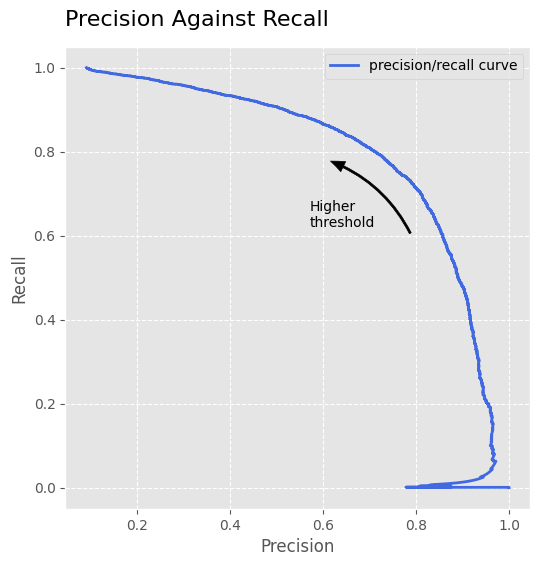

In [128]:
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(6,6))

# used for boolean indexing
preci = precisions[:-1]
rec = recalls[:-1]

# the line 
ax.plot(precisions, recalls, color='royalblue', linewidth=2, label='precision/recall curve')

# note
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="black"))
plt.text(0.57, 0.62, "Higher\nthreshold", color="black")

# aestethics 
ax.grid(linestyle='--')
ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
ax.set_title('Precision Against Recall', loc = 'left', fontsize = 16, pad=15)
ax.legend()

plt.show()

In [104]:
preci[thresholds == 3000]

array([], dtype=float64)

Finally, suppose we want to search the smallest threshold at which we have a precision of $0.9$. How can we do this? By using the `argmax()` method, that will give us the index of the first value satisfying this condition in the `precisions` array:

In [134]:
idx_90 = (precisions >= 0.9).argmax()
threshold_90 = float(thresholds[idx_90])
threshold_90

3370.0194991441826

We can take once again our `y_scores` to check this: 

In [136]:
y_pred_90 = y_scores > threshold_90

print(precision_score(y_train_5, y_pred_90))
print(recall_score(y_train_5, y_pred_90))

0.9
0.47980077476480354


We indeed have a precision of $90$% but now we catch less than half of the fives present in the dataset. 

#### 2.2.6. The ROC Curve

The ***receiver operating characteristic*** (ROC) curve is another common tool used with binray classifiers. It is very similar to the prediction/recall curve, but instead of plotting precisions versus recall, the ROC curve plots the *true positive rate* (another name for recall) against the *false positive rate* (FPR), also called the fall-out. The FPR is the ratio of negative instances that are wrongly classified as positive. Furthermore, we have: 
$$
\text{FPR} = 1 - \text{TNR} = 1 - \text{specificity}
$$
+ where *TNR* is the true negative rate, also called *specificity*.

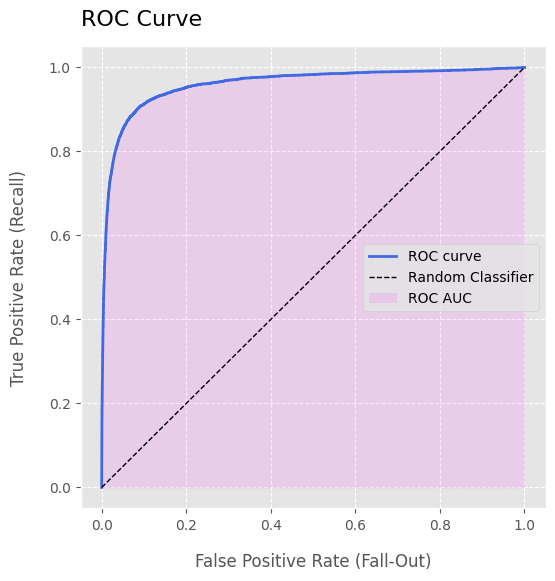

In [166]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

# the plot:
fig, ax = plt.subplots(figsize = (6, 6))

# the ROC curve
ax.plot(fpr, tpr, linewidth = 2, color = 'royalblue', label = 'ROC curve')

# the diagonal 
ax.plot([0, 1], [0, 1], '--', color='black', linewidth=1, label='Random Classifier')

# area under the curve
ax.fill_between(fpr, tpr, color = 'magenta', label = 'ROC AUC', alpha=0.1)

# aestethics
ax.grid(linestyle='--')
ax.set_xlabel('False Positive Rate (Fall-Out)', labelpad=15)
ax.set_ylabel('True Positive Rate (Recall)', labelpad=15)
ax.set_title('ROC Curve', loc = 'left', fontsize = 16, pad=15)
ax.legend()
plt.show()

As we can see, we face a trade-off in this given situation. The higher the recall, the higher the false positive rate (i.e. the lower the precision). 
On another hand, this graph also presents us a new metric for binary classifier intercomparison: the *area under the curve* (AUC). If $AUC = 1$, this means that we have a perfect classifier. On the other hand, if the ROC AUC $= 0.5$ this means that our classifier is not better than random guessing. In our case, we can compute this area thanks to `scikit-learn`:

In [154]:
from sklearn.metrics import roc_auc_score

roc_auc = float(roc_auc_score(y_train_5, y_scores))
round(roc_auc, 2)

0.96

**PR curve or ROC curve?**  

In our case, it would make more sense to choose the PR curve since we only have approximately 10% of fives in the dataset, thus the ROC curve gives us the biased impression that our classifier is effective whereas the PR curve inidcates that there is still room for improvement. 

#### 2.2.7. Models Intercomparison 

Before delving into multiclass classification, let's use another algorithm for our binary classification problem and observe how it performs agains the `SDGClassifier()`. The algorithm we use is the `RandomForestClassifier()`:

Note: Because of its structure, this classifier does not have a `decision_function()` method. Therefore, we will use another useful method which is `predict_proba()` that return class probabilities for each instance: 

In [160]:
from sklearn.ensemble import RandomForestClassifier

# we create an instance of the RandomForestClassifier
rf_clf = RandomForestClassifier(random_state = 42)

# we train the model
y_probas_forest = cross_val_predict(rf_clf, X_train, y_train_5, cv = 3, method = 'predict_proba')

# we get the scores
y_scores_forest = y_probas_forest[:, 1] # we only keep the second column which contains the positive class probabilities

In [161]:
y_scores_forest

array([0.89, 0.02, 0.04, ..., 0.98, 0.08, 0.07])

Now, we get what we need for the PR curve: 

In [162]:
rf_precision, rf_recall, rf_thresholds = precision_recall_curve(y_train_5, y_scores_forest)

We compare both models: 

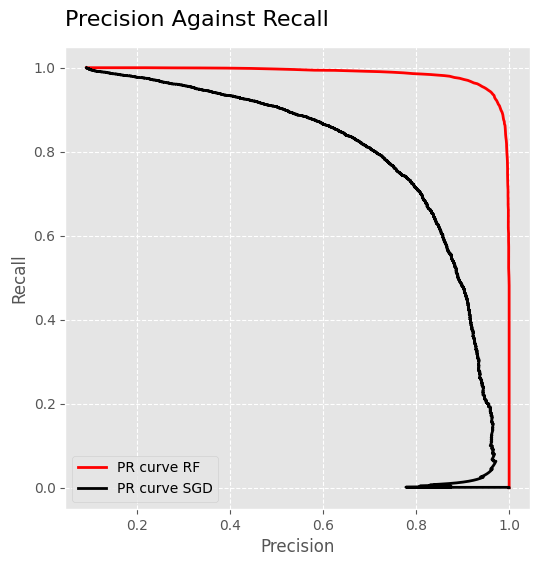

In [163]:
# the plot:
fig, ax = plt.subplots(figsize = (6, 6))

# PR line for the RF model:
ax.plot(rf_precision, rf_recall, label = 'PR curve RF', linewidth=2, color='red')

# PR line for the SGD model:
ax.plot(precisions, recalls, label = 'PR curve SGD', linewidth=2, color='black')

# aestethics
ax.grid(linestyle='--')
ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
ax.set_title('Precision Against Recall', loc = 'left', fontsize = 16, pad=15)
ax.legend()

plt.show()


We see that the `RandomForestClassifier()` is much more powerful than the `SDGClassifier()` since it is much closer to the top right corner (i.e. we can reach a higher recall and precision at the same time than with the `SDGClassifier()`).

## 3. Multiclass Classification

### 3.1. Mutliclass Classification with Multiple Binary Classifiers

Multiclass classification distinguishes itself from binary classification because the Classifier should be able to identify not only two different classes (e.g. positive and negative) but multiple classes. However, sometimes it is possible to still use binary classifier for performing a multiclass classification.  

**One-Versus-the-Rest Strategy**  

In the case at hand (with the `mnist` dataset), this strategy consists of training ten binary classifier, able to recognize each ten digits and then take the highest score for each digits. 

**One-Versus-One Strategy**  

This other strategy offers to train binary classifiers for every pair of digits, e.g.g one to distinguish 0s and 1s. This strategy requires to train many classifier ($[n \times (n-1)]\div2$). In the end, the classifier will select the class which win the most duels. 

The beauty of Scikit-Learn is that when you use a binary classifier for a multiclass classification, it automatically runs a OvO or OvR strategy. For illustrating our point, we will use a support vector classifier `SVC` and train it on the first $20,000$ images (otherwise it will take too much time): 

In [170]:
from sklearn.svm import SVC

# we create an instance of the SVC
svc_clf = SVC(random_state=42)

# we train the model
svc_clf.fit(X_train[:20000], y_train[:20000])


SVC(random_state=42)

Now let's make a prediction on one digit: 

In [174]:
import random as rd

['5']


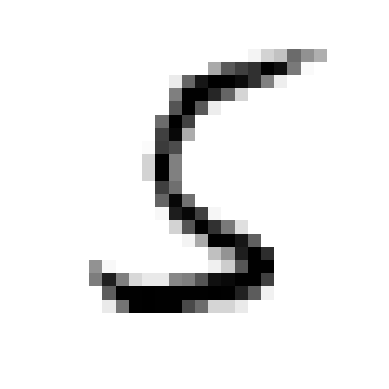

In [215]:
rd_digit = rd.randint(0, 20000)
rd.seed(42)

# we predict the digit
y_pred_svc = svc_clf.predict([X_train[rd_digit]])
print(y_pred_svc)

# we plot the digit
plot_digit(X_train[rd_digit])

That's correct! What did the algorithm do? Basically, it made 45 different predictions. Then, it looks at which classes is most frequently represented among the 45 predicted classes and take this one. Now, we can observe the scores that each class got for this particular instance ('5'):

In [218]:
rd_digit_score = svc_clf.decision_function([X_train[rd_digit]])
print(rd_digit_score.round(2))

[[ 2.74  4.13  6.27  6.27  1.7   9.31  8.28 -0.31  6.29  0.7 ]]


As one can see, the highest score is the one in the fifth position (remember that in Python indexing starts at $0$). But how can we be sure that it is the class '5'? 

In [221]:
class_id = rd_digit_score.argmax() # we take the index of the highest score, which is the class id

# we get the classes
all_classes = svc_clf.classes_

# we get the class associated with to our id
print(all_classes)
all_classes[class_id]

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


'5'

### 3.2. Error Analysis

#### 3.2.1. Confusion Matrix

To have a first impression of how our model is performing, plotting a heatmap based on a confusion matrix could be a good idea: 

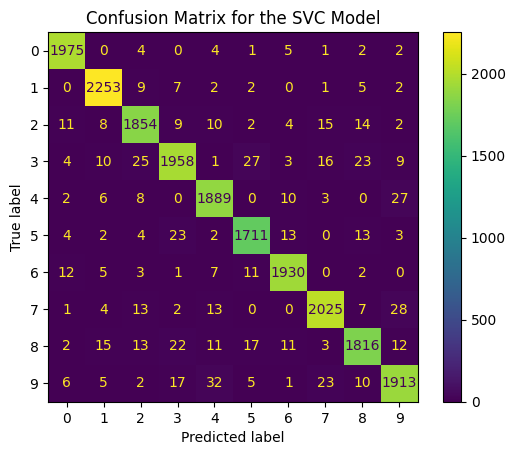

In [228]:
from sklearn.metrics import ConfusionMatrixDisplay

# reset style
plt.rcdefaults()

# we calculate the confusion matrix
y_train_cv_pred = cross_val_predict(svc_clf, X_train[:20000], y_train[:20000], cv = 3)
ConfusionMatrixDisplay.from_predictions(y_train[:20000], y_train_cv_pred)

plt.title('Confusion Matrix for the SVC Model')
plt.show()

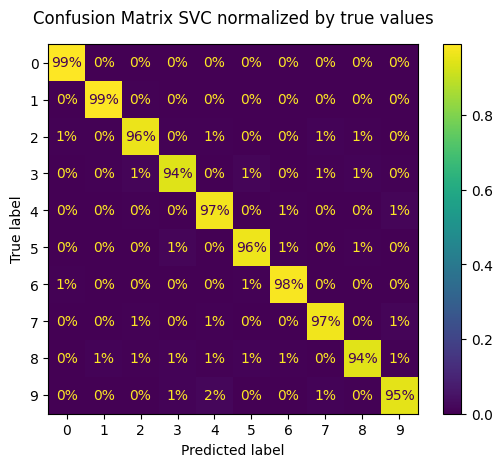

In [227]:
ConfusionMatrixDisplay.from_predictions(y_train[:20000], y_train_cv_pred, 
                                        display_labels = all_classes, 
                                        normalize='true', 
                                        values_format='.0%')
plt.title('Confusion Matrix SVC normalized by true values', pad=15)
plt.show()

Another useful confusion matrix we can plot is the following: 

[0 0 0 ... 0 0 0]


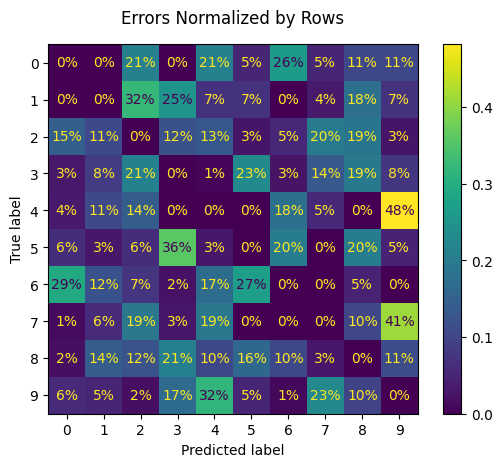

In [240]:
sample_weights = (y_train_cv_pred != y_train[:20000]).astype(int)
print(sample_weights)

ConfusionMatrixDisplay.from_predictions(y_train[:20000], y_train_cv_pred, sample_weight=sample_weights, normalize='true', values_format='.0%')
plt.title('Errors Normalized by Rows', pad=15)
plt.show()



The code: 
```python
sample_weights = (y_train_cv_pred != y_train[:20000]).astype(int)
```
creates an array with two values, `0` and `1`. Basically, we are giving the weight $0$ to all correct predictions. This means that now we only have the error repertoried in this matrix. 

**How to Interpret ?**  

For instance, if we look at the brightest value in the cm ($48$%), this means that $48$% of the errors made on the number $4$ were misclassifications as $9$.  
Analyzing those missclassifications errors allow us to gain insights in how to further improve the model with different classifiers or with different features engineering processes. 

## 4. Multilabel Classification

Until now, each instance has always been assigned to just one class. But in some cases you may want your classifier to output multiple classes for each instance. Consider our working example with the digits but this time we do not have only one digit per picture but multiple of them and we want our classifier to output which ones are present. So for instance, if we have a picture with $1$, $3$, $6$, it should output: 
```python
[False, True, False, True, False, False, True, False, False, False] 
```

Let's look at a simple example for illustration purpose: 

In [247]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# we create an instance of the KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)

# input
y_train_large = (y_train.astype('int8') >= 7)
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd] # we create a 2D array with two target labels
print(y_multilabel)
print(y_multilabel.shape)

[[False  True]
 [False False]
 [False False]
 ...
 [False  True]
 [False False]
 [ True False]]
(60000, 2)


Now we make some predictions: 

[[ True  True]]


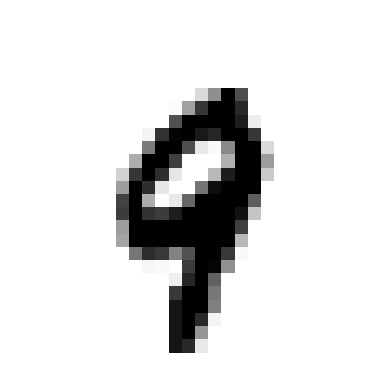

In [251]:
knn_clf.fit(X_train, y_multilabel)

# we predict the digit
rd.seed(42)
rd_digit = rd.randint(0, 60000)
y_pred_knn = knn_clf.predict([X_train[rd_digit]])
print(y_pred_knn)

# we plot the digit
plot_digit(X_train[rd_digit])

**What happened?**

1. In this little example, we are creating a array named `y_multilabel` that contains $60,000$ instance with two boolean values per instance. The first boolean value indicates whether the labelled digit is equal or bigger than $7$. Then, the second label indicates wether the digit is odd or not. 
2. The second step consists of using a classifier algorithm that can realize multilabel predictions, the `KNeighborsClassifier()`, to predict the appartenance to the two mentionned classes of a randomly selected digit. In this case, the selected digit is a $9$ and we observe that the classifier correctly predicts the bilabels. 

**An Alternative Solution: The `ClassifierChain()`**

In many multi-label classification tasks, each sample can have multiple labels simultaneously. A common simple approach is to train one binary classifier per label independently (often using scikit-learn’s MultiOutputClassifier). However, that strategy ignores any correlations between labels.

A ClassifierChain addresses this by arranging the binary classifiers in a chain. Each classifier in the chain not only uses the original features but also the predictions of the previous classifiers in the chain as additional features. This way, it can capture dependencies among labels.


In [252]:
from sklearn.multioutput import ClassifierChain

# we create an instance of the ClassifierChain
chain_clf = ClassifierChain(svc_clf, cv=3, random_state=42)

# we train the model
chain_clf.fit(X_train[:20000], y_multilabel[:20000])

# we predict the digit
rd.seed(42)
rd_digit = rd.randint(0, 20000)
y_pred_chain = chain_clf.predict([X_train[rd_digit]])


We print the results:   

In [254]:
print(y_pred_chain)

[[0. 1.]]


## 5. Multioutput Classification

The last type of classification task we should discuss is named ***multioutput classification***. 

Multioutput classification is a supervised learning problem where the goal is to predict multiple discrete (categorical) outputs simultaneously for each input. More formally, consider the following definition:
+ Input Space: Let $\mathcal{X}$ denote the space of input features. An input instance is represented as $x \in \mathcal{X}$.
+ Output Space: Let there be $m$ discrete output variables. For each output $i$ (where $i=1,2,\dots, m$), let the corresponding label come from a finite set $\mathcal{Y}_i$. The joint output space is then given by the Cartesian product:

$\mathcal{Y} = \mathcal{Y}_1 \times \mathcal{Y}_2 \times \cdots \times \mathcal{Y}_m$.

+ Objective: The aim is to learn a mapping (or function)

$f: \mathcal{X} \to \mathcal{Y}$

such that for a given input $x$, the predicted tuple of labels

$f(x) = \left( f_1(x), f_2(x), \dots, f_m(x) \right)$

approximates the true labels $\left( y_1, y_2, \dots, y_m \right)$.

**Example:**

Imagine you are working on a medical diagnosis system where each patient may have multiple conditions simultaneously. For each patient, based on a set of clinical measurements (features), you want to predict whether they have each of several possible conditions (labels). This is a classic multioutput classification problem because instead of predicting one disease, you’re predicting multiple diseases at once.

**Practical Example With the `mnist` Dataset**

In this example, our goal is to clean noisy images. 

First, let's start by adding the noise: 

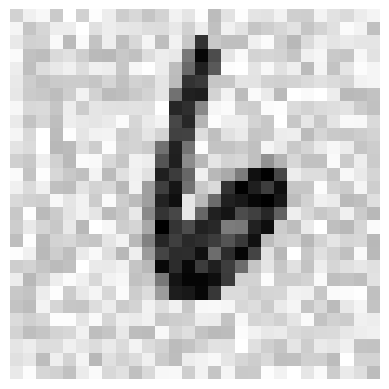

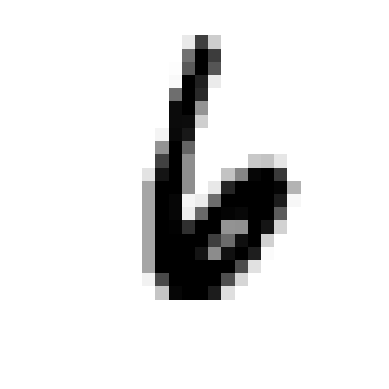

In [256]:
np.random.seed(42)
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise

# the labels are the original images
y_train_mod = X_train
y_test_mod = X_test

# we plot the noisy image
plot_digit(X_train_mod[204])
plot_digit(y_train_mod[204])

Now, let's train a classifier to clean this image: 

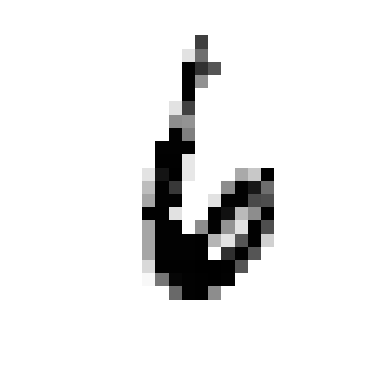

In [259]:
# an instance of the knn classifier
knn_clf = KNeighborsClassifier()

# we train the model
knn_clf.fit(X_train_mod, y_train_mod)

# we predict the digit
rd.seed(42)
rd_digit = 204
clean_digit = knn_clf.predict([X_train_mod[rd_digit]])
plot_digit(clean_digit)
plt.show()


Close enough from the original result! 

**Final Comment**  

In this task, we saw that the limit between classification and regression can sometimes appeared blurred. In the case at hand, we are predicting the value (intensity of greys) in each cell of the $28 \times 28$ matrix. Hence, we are walking on the limit between classification and regression. 

___
# END